In [14]:
import pandas as pd
import numpy as np
import requests

import time
import matplotlib.pyplot as plt
import os, sys

sys.path.append('../../src/')
from KDEs import *
from copulae1 import *
from toolbox import *
import os

In [15]:
coin_name = 'xrp'
df = pd.read_csv('../../data/cleaned_data/BBT_future_Tiingo_%s.csv'%coin_name)

In [20]:

rs = df.loc[:, 'log return %s'%coin_name]
rf = df.loc[:, 'log return future']

from statsmodels.distributions.empirical_distribution import ECDF

ecdf_rs = ECDF(rs)
ecdf_rf = ECDF(rf)
ecdf_rh = ECDF(rs-rf)


u = ecdf_rs(rs)
v = ecdf_rf(rf)

kde_s = KDE(rs, "Gaussian")
kde_f = KDE(rf, "Gaussian")

m = min([np.min(rs), np.min(rf)])
M = max([np.max(rs), np.max(rf)])

Text(0, 0.5, 'Future(CME BTC)')

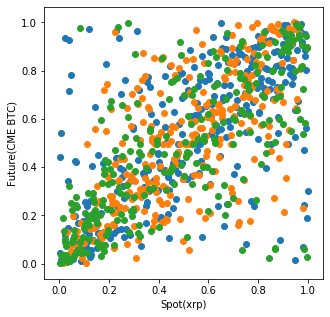

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(u[:300],v[:300])
plt.scatter(u[300:600],v[300:600])
plt.scatter(u[600:900],v[600:900])

plt.xlabel('Spot(%s)'%coin_name)
plt.ylabel('Future(CME BTC)')

In [22]:
C1 = Gaussian({'rho':0.9}, kde_s, kde_f)
C1.canonical_calibrate(u,v)

C2 = t_Copula({'rho':0.9, 'nu':4}, kde_s, kde_f, 2)
C2.canonical_calibrate(u,v)

../../src/copulae1.py:116: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(np.log(part1 / part2))


Optimization terminated successfully.
         Current function value: -0.271419
         Iterations: 34
         Function evaluations: 73


../../src/copulae1.py:261: RuntimeWarning: invalid value encountered in true_divide
  return np.nanmean(np.log(part1 / part2))


Optimization terminated successfully.
         Current function value: -0.355512
         Iterations: 78
         Function evaluations: 172


array([0.71143492, 3.07194023])

In [23]:
C1.paras

{'rho': 0.6509387290477753}

In [24]:
C2.paras

{'rho': 0.7114349195892573, 'nu': 3.07194022829137}